## Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms
##### Objective:
The objective of this assignment is to introduce various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.

##### Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the datas

##### Implementing Clustering Algorithms:
1. Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
2. Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
3. Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

##### Cluster Analysis and Interpretation:
Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

##### Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.

Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
##### Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load dataset
air_df = pd.read_csv('EastWestAirlines.csv')
air_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
air_df.shape

(3999, 12)

In [4]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


#### 1.1 DATA PREPROCESSING

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


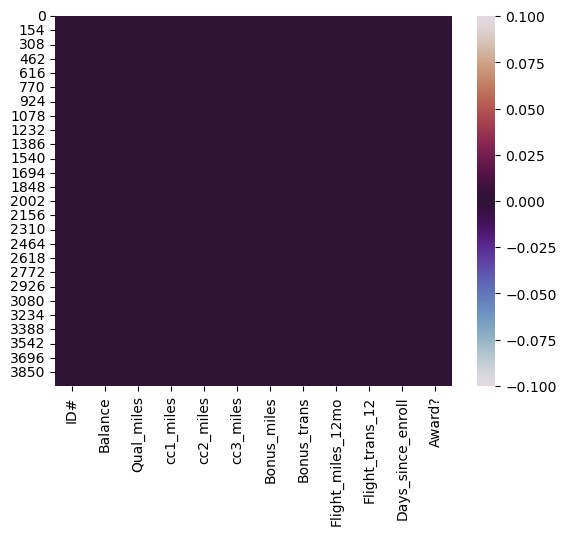

In [5]:
# Checking for missing values
print(air_df.isnull().sum())

# Confirming using heatmap
sns.heatmap(air_df.isnull(), cmap = 'twilight')
plt.show()

In [6]:
# Rename columns: ID# and Award?
air_df.rename(columns = {"ID#":"ID", "Award?":"Award"}, inplace = True)

# Set ID as index
air_df.set_index('ID', inplace = True)
air_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [7]:
# Search for duplicate
if(air_df.duplicated().sum() != 0):
    print("DUPLICATES ARE PRESENT")
    print("No.of duplicated rows: ",air_df.duplicated().sum())
else:
    print("NO DUPLICATES")

# Print duplicated values
air_df[air_df.duplicated(keep = False)]

DUPLICATES ARE PRESENT
No.of duplicated rows:  1


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3393,1000,0,1,1,1,0,0,0,0,1597,0
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [8]:
# Remove Duplicates
air_df.drop_duplicates(inplace = True)
air_df.shape

print("No.of duplicated rows: ",air_df.duplicated().sum())

No.of duplicated rows:  0


In [9]:
# Remove outliers using IQR method
def remove_outliers_iqr(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    mask = pd.Series(True, index=data.index)  # Keep all rows initially

    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Update mask: keep only rows that are NOT outliers in this column
        mask &= (data[col] >= lower) & (data[col] <= upper)

    return data[mask]  # Keep only rows that are not outliers in any column

air_clean = remove_outliers_iqr(air_df)
air_clean

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [10]:
# Scale the features using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
air_scaled = pd.DataFrame(scaler.fit_transform(air_clean), columns = air_clean.columns)
air_scaled

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.138672,0.0,0.0,0.0,0.0,0.003019,0.026316,0.000000,0.0,0.843629,0.0
1,0.094745,0.0,0.0,0.0,0.0,0.003730,0.052632,0.000000,0.0,0.839768,0.0
2,0.203884,0.0,0.0,0.0,0.0,0.071528,0.105263,0.000000,0.0,0.847732,0.0
3,0.072690,0.0,0.0,0.0,0.0,0.008674,0.026316,0.000000,0.0,0.837838,0.0
4,0.080805,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.836631,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2870,0.090954,0.0,0.0,0.0,0.0,0.147896,0.105263,0.260756,0.5,0.168316,1.0
2871,0.317569,0.0,0.0,0.0,0.0,0.017019,0.131579,0.000000,0.0,0.167350,1.0
2872,0.363041,0.0,0.5,0.0,0.0,0.441466,0.210526,0.000000,0.0,0.168195,1.0
2873,0.270744,0.0,0.0,0.0,0.0,0.008674,0.026316,0.651890,0.5,0.168074,0.0


#### 1.2. EXPLORATORY DATA ANALYSIS

In [11]:
# Statistical summary
air_df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [12]:
# Droping unwanted columns
air_scaled.drop(columns=['Qual_miles', 'cc2_miles', 'cc3_miles','Flight_miles_12mo', 'Flight_trans_12'], inplace=True)
air_scaled

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
0,0.138672,0.0,0.003019,0.026316,0.843629,0.0
1,0.094745,0.0,0.003730,0.052632,0.839768,0.0
2,0.203884,0.0,0.071528,0.105263,0.847732,0.0
3,0.072690,0.0,0.008674,0.026316,0.837838,0.0
4,0.080805,0.0,0.000000,0.000000,0.836631,0.0
...,...,...,...,...,...,...
2870,0.090954,0.0,0.147896,0.105263,0.168316,1.0
2871,0.317569,0.0,0.017019,0.131579,0.167350,1.0
2872,0.363041,0.5,0.441466,0.210526,0.168195,1.0
2873,0.270744,0.0,0.008674,0.026316,0.168074,0.0


In [13]:
# Correlation Matrix
corr_mat = air_scaled.corr()
corr_mat

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award
Balance,1.000000,0.459873,0.454498,0.357868,0.235276,0.048744
cc1_miles,0.459873,1.000000,0.905541,0.629223,0.180664,0.331700
Bonus_miles,0.454498,0.905541,1.000000,0.619372,0.155120,0.357000
Bonus_trans,0.357868,0.629223,0.619372,1.000000,0.132005,0.253727
Days_since_enroll,0.235276,0.180664,0.155120,0.132005,1.000000,0.138850
Award,0.048744,0.331700,0.357000,0.253727,0.138850,1.000000


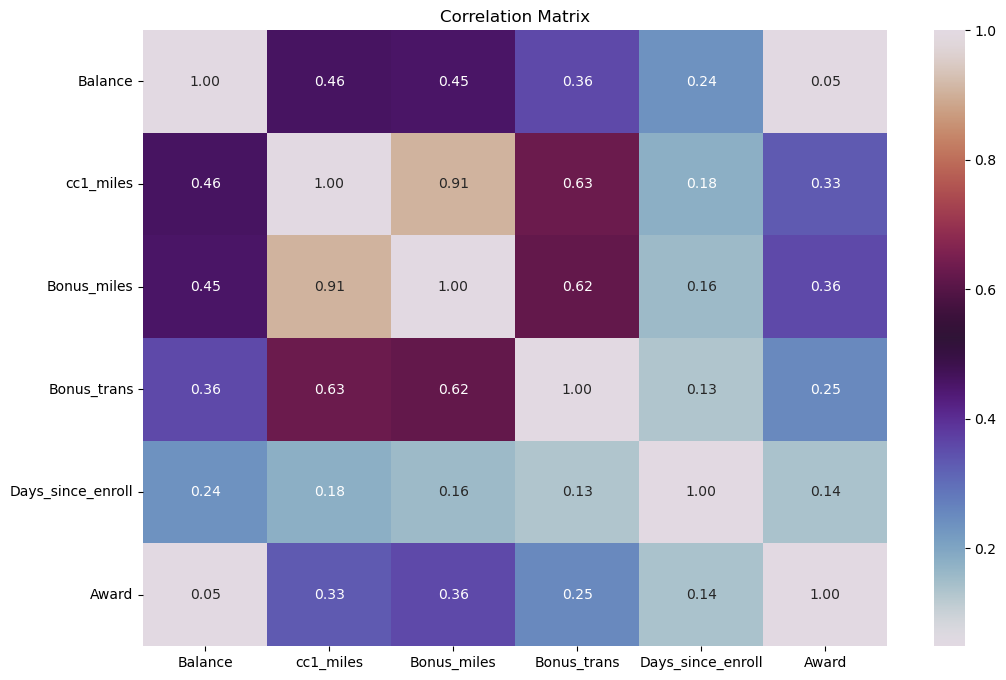

In [14]:
# Visualising in a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap="twilight", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### 1.3 VISUALIZATIONS

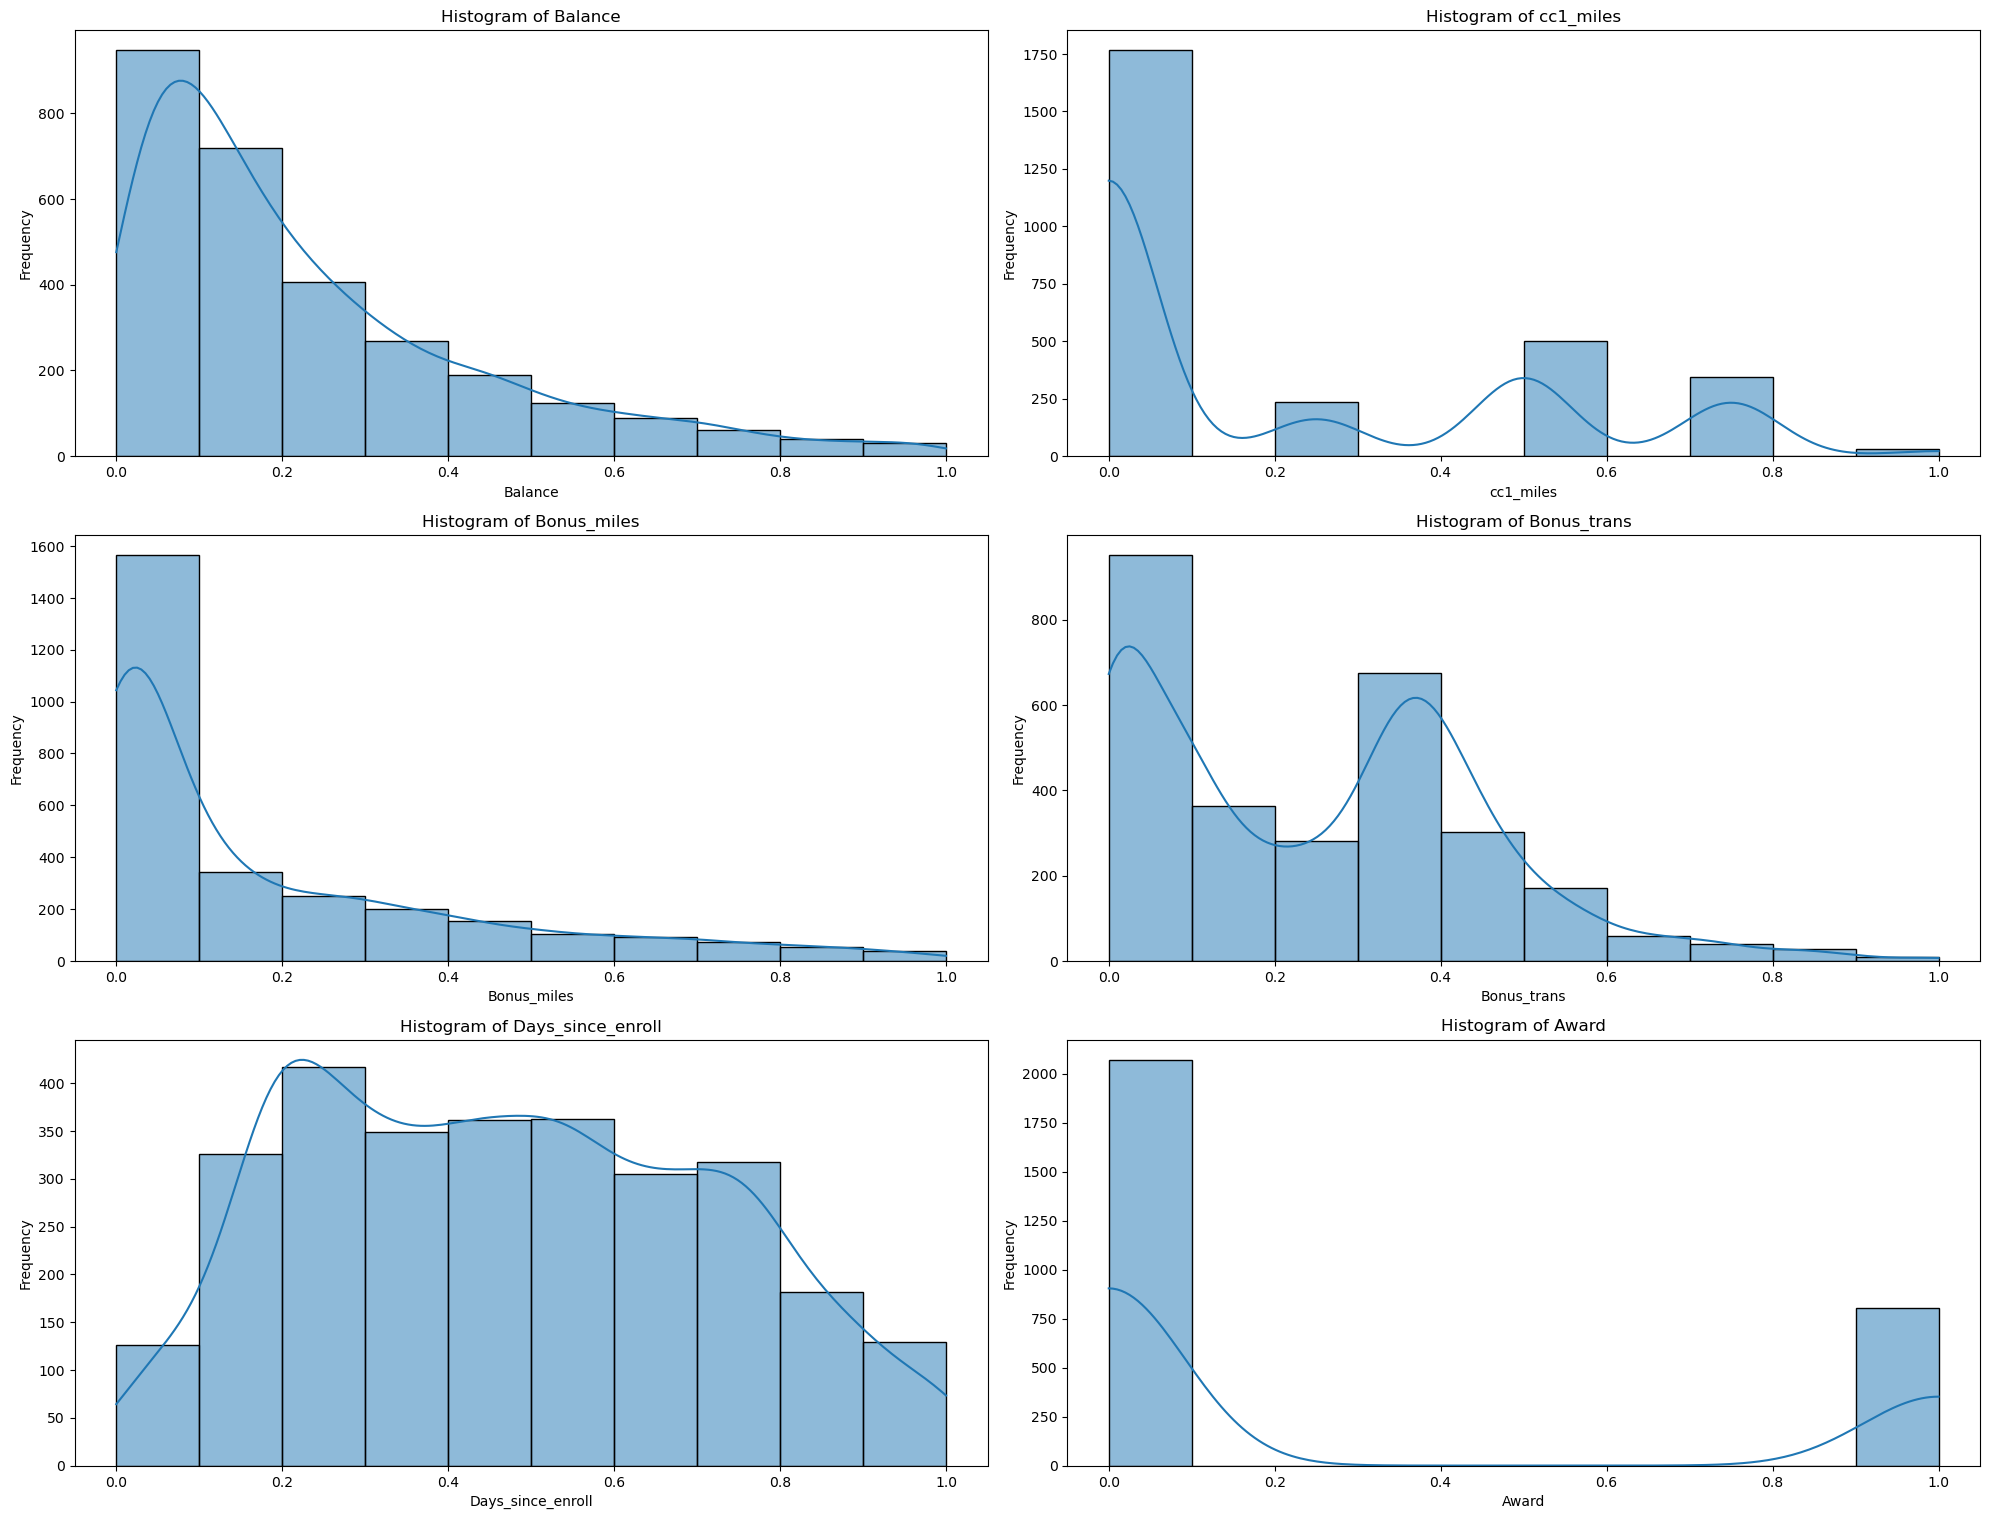

In [15]:
# HISTOGRAM
plt.figure(figsize = (20,30))
for i, column in enumerate(air_scaled,1):
    plt.subplot(6,2,i)
    sns.histplot(air_scaled[column], bins = 10, kde = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

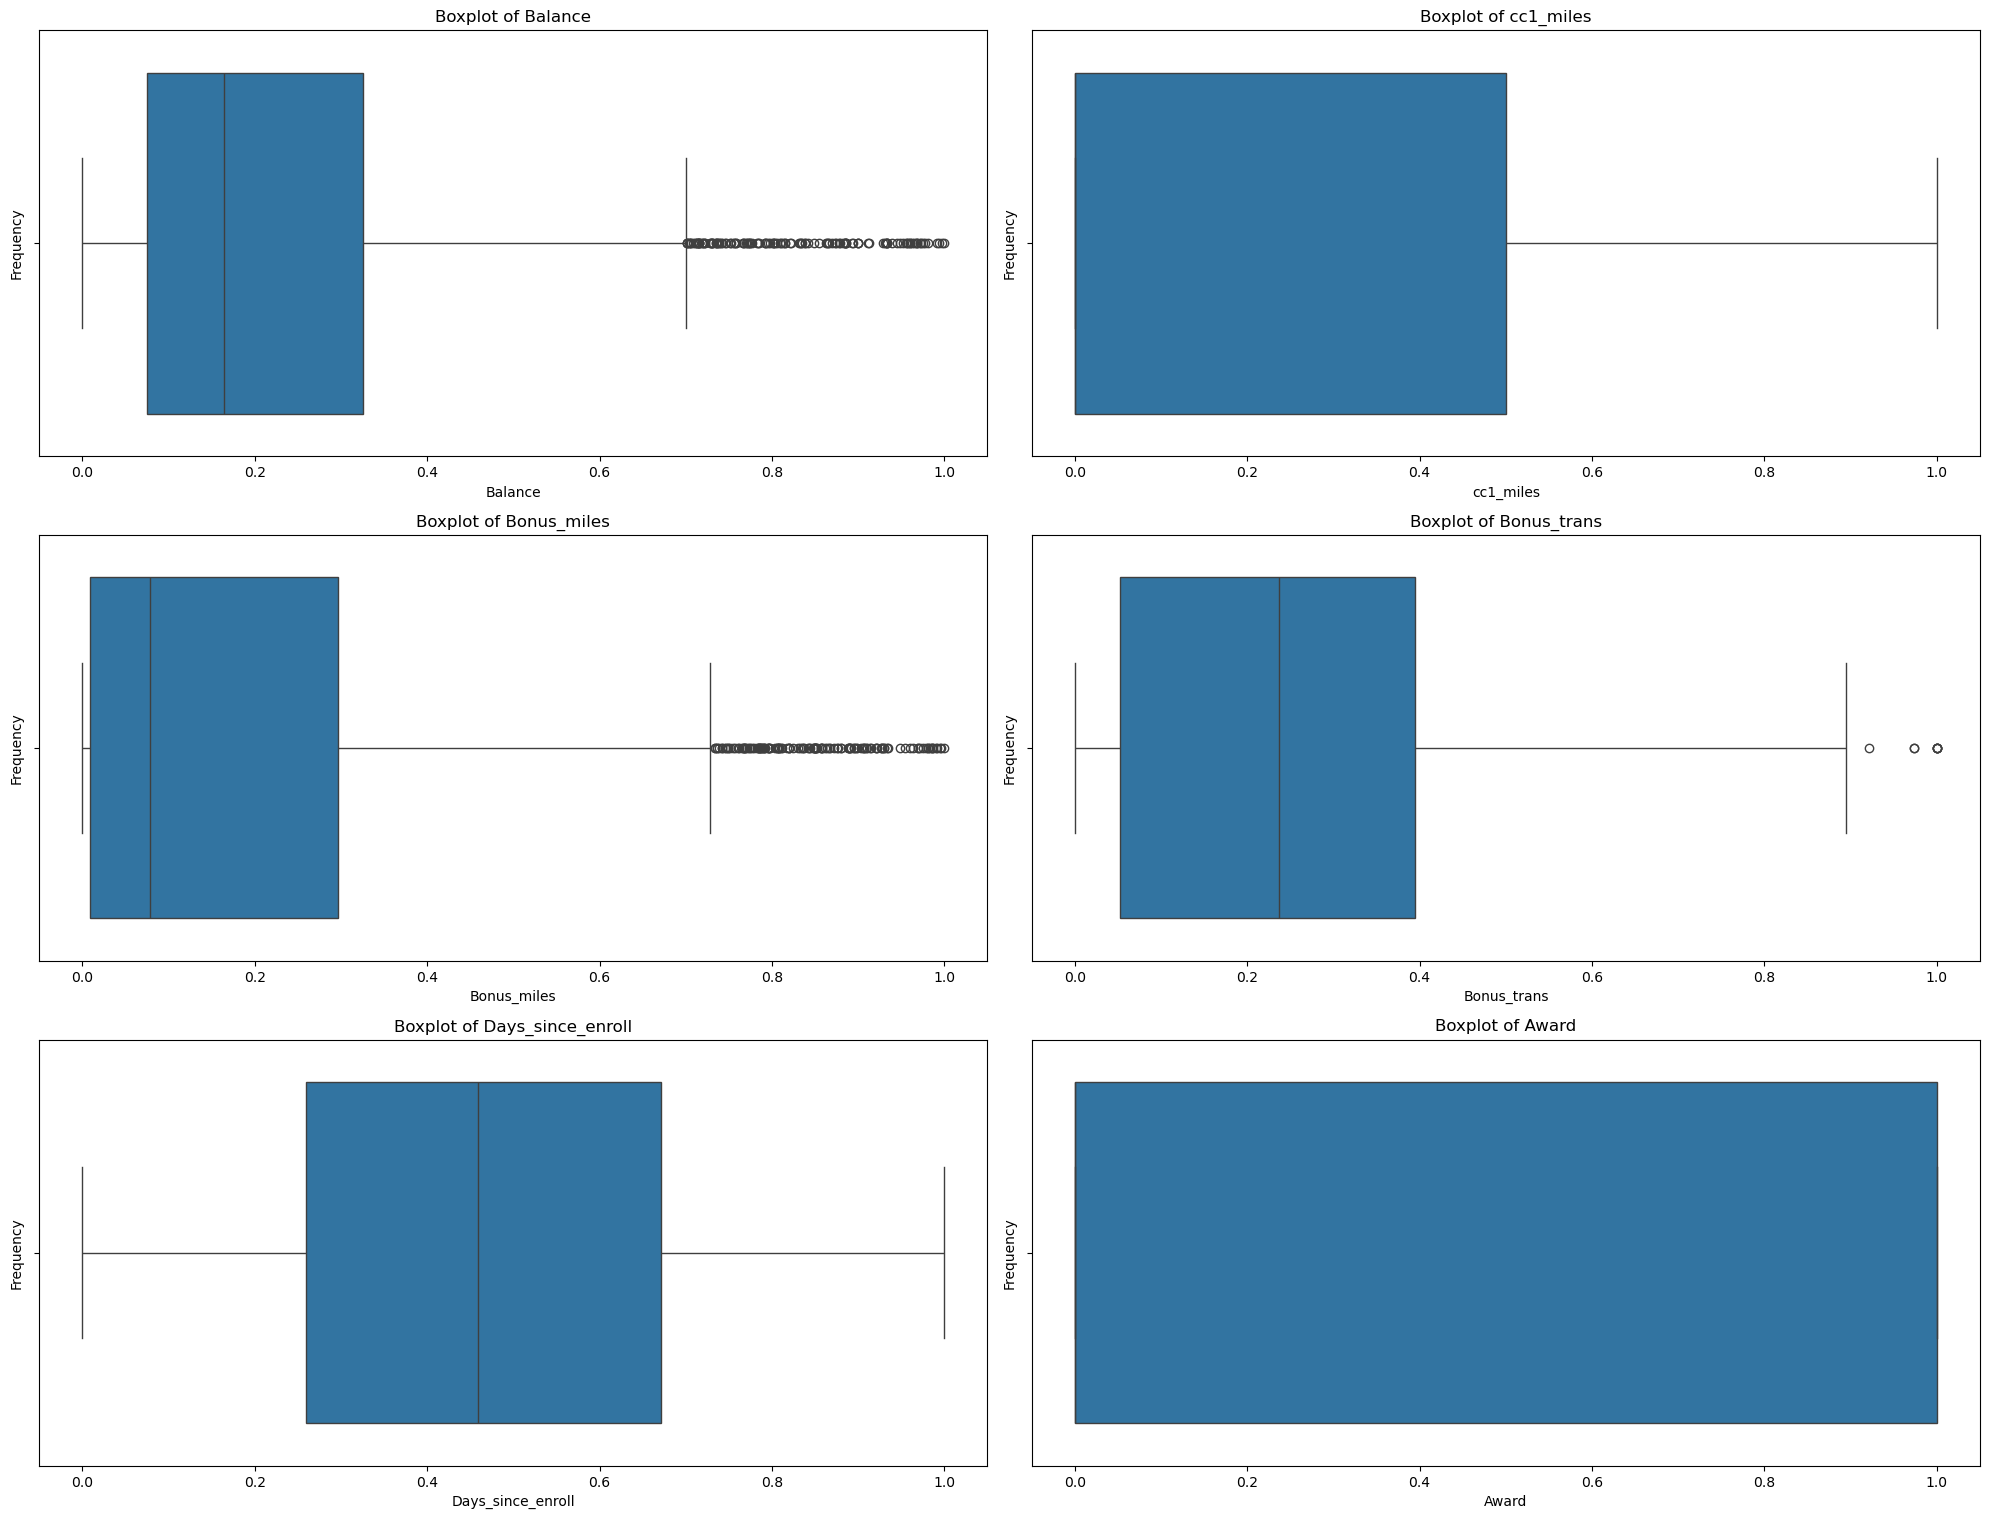

In [16]:
# BOXPLOT
plt.figure(figsize = (20,30))
for i, column in enumerate(air_scaled,1):
    plt.subplot(6,2,i)
    sns.boxplot(x = air_scaled[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: >

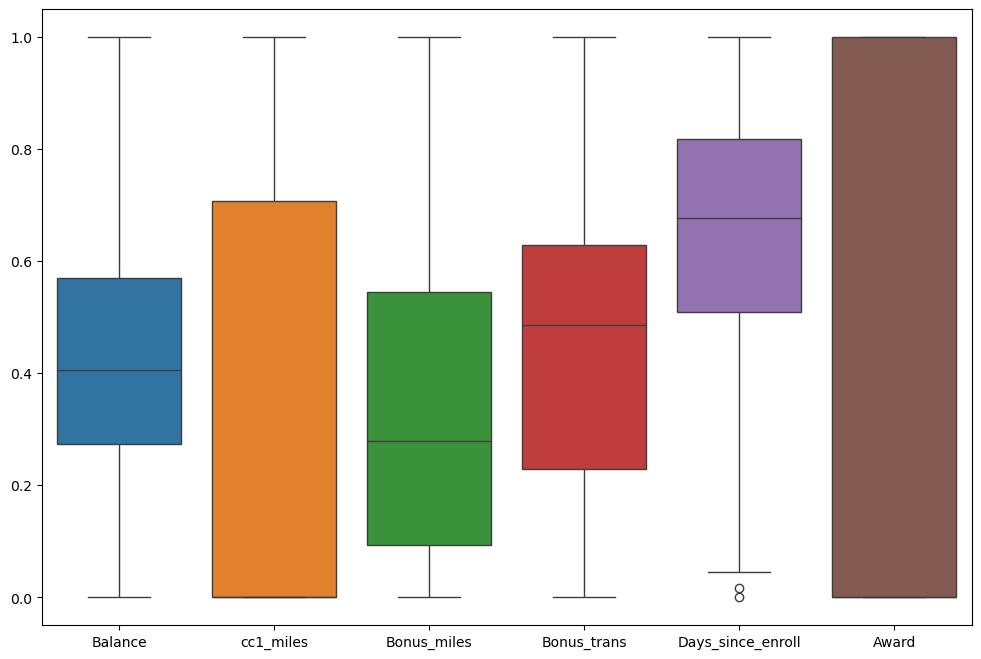

In [17]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(air_scaled))

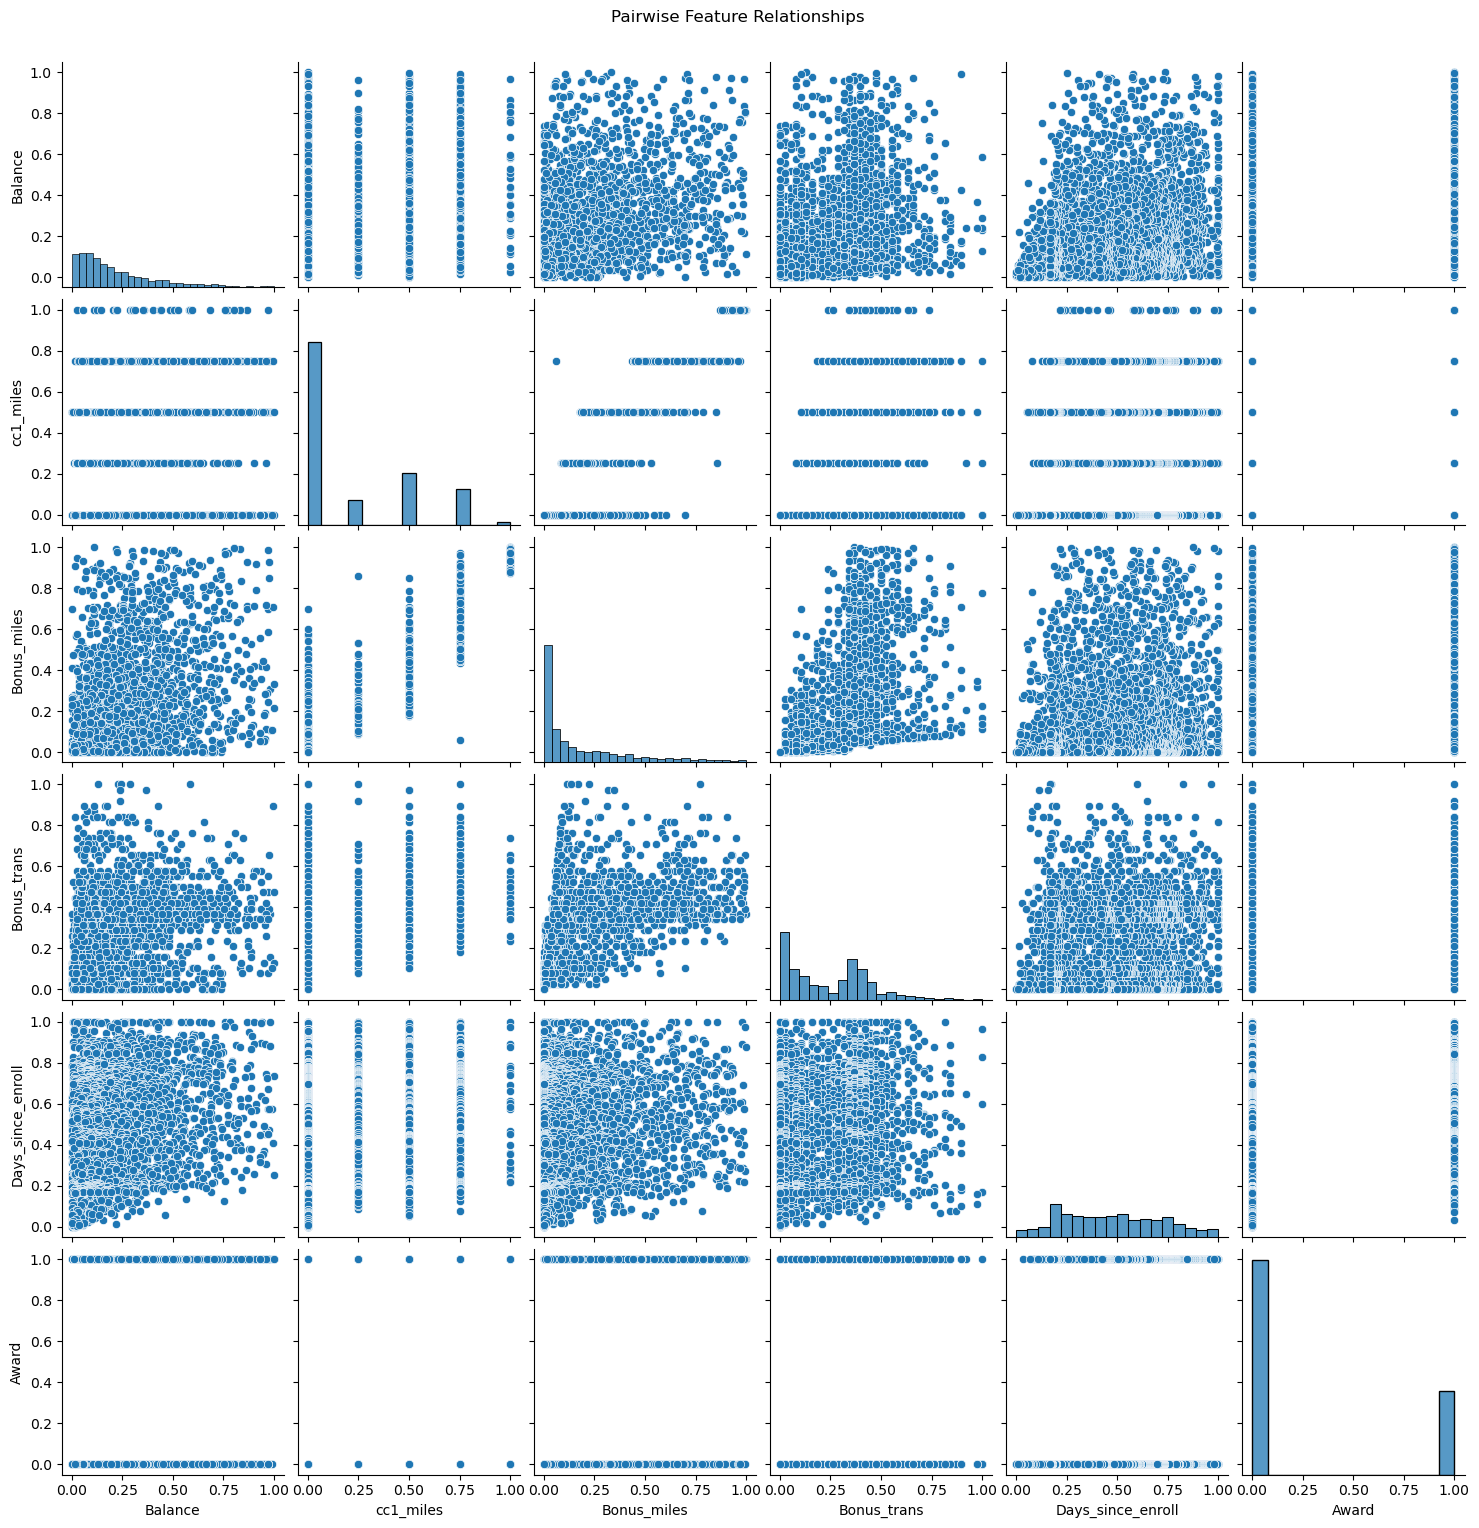

In [18]:
# Pairplot for selected features
#selected_features = air_scaled.columns[:5]  # pick first 5 for simplicity
sns.pairplot(air_scaled)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

### 2 CLUSTERING
#### 2.1. K-MEANS CLUSTERING

In [19]:
# K-Means Clustering
wcss = []
k_range = range(2,15)

from sklearn.cluster import KMeans
for k in k_range:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, random_state = 0)
    kmeans.fit(air_scaled)
    labels = kmeans.labels_
    centriods = kmeans.cluster_centers_
    wcss.append(kmeans.inertia_)

kmeans_df = pd.DataFrame({"Clusters":k_range, "WCSS":wcss})
kmeans_df

,Clusters,WCSS
0,2,765.244544
1,3,538.361685
2,4,465.528522
3,5,348.465370
4,6,322.073065
5,7,297.981383
6,8,281.081712
7,9,257.710027
8,10,239.252818
9,11,231.425697


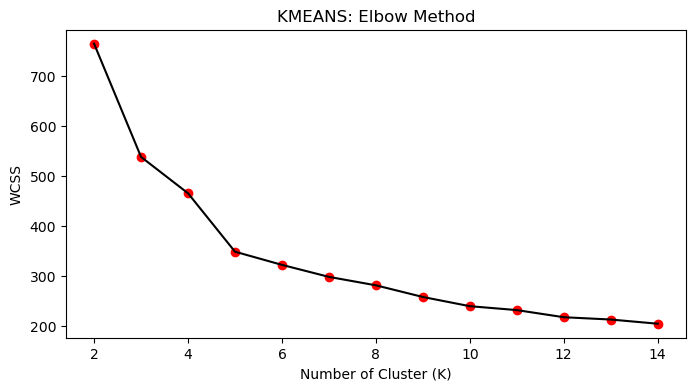

In [20]:
# Elbow Method
plt.figure(figsize=(8,4))
plt.plot(k_range, wcss, color = 'black')
plt.scatter(k_range, wcss, color = 'red')
plt.title("KMEANS: Elbow Method")
plt.xlabel("Number of Cluster (K)")
plt.ylabel("WCSS")
plt.show()

From the Elbow Method graph, the optimal number of clusters appears to be 4.

In [21]:
# Silhouette Score
from sklearn.metrics import silhouette_score
sil_scores = []
K_range = range(2,11)

for k in K_range:
    kmeans = KMeans(n_clusters = k, max_iter = 500, init = 'k-means++', random_state = 42)
    labels = kmeans.fit_predict(air_scaled)
    sil_scores.append(silhouette_score(air_scaled,labels))

sil_scores

[0.48560299032065507,
 0.4377873447824201,
 0.3480664569293965,
 0.3359779928832733,
 0.32636186527648614,
 0.3404662629654097,
 0.31072781899938373,
 0.31328419413125813,
 0.30917781836610686]

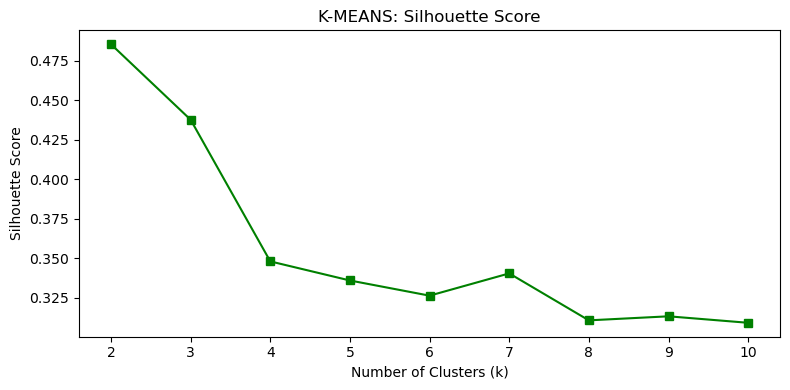

In [22]:
# Silhouette Score Plot
plt.figure(figsize = (8,4))
plt.plot(K_range, sil_scores, marker = 's', color = 'green')
plt.title("K-MEANS: Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

From the Silhouette Score plot, the optimal number of clusters (k) is clearly 2.

Silhouette Score (k=2) focuses on quality of clustering.

Elbow Method (k=4) focuses on compression of variance (how much WCSS is reduced).

In [23]:
# K-Means with k=2
from sklearn.cluster import KMeans
import pandas as pd

kmeans_2 = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_2.fit(air_scaled)
air_scaled['Cluster_2'] = kmeans_2.labels_

In [24]:
# K-Means with k=4
kmeans_4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_4.fit(air_scaled)
air_scaled['Cluster_4'] = kmeans_4.labels_

In [25]:
# Evaluating the Silhouette Score
score_k2 = silhouette_score(air_scaled.drop(columns=['Cluster_2', 'Cluster_4']), air_scaled['Cluster_2'])
score_k4 = silhouette_score(air_scaled.drop(columns=['Cluster_2', 'Cluster_4']), air_scaled['Cluster_4'])

print(f"Silhouette Score (k=2): {score_k2:.3f}")
print(f"Silhouette Score (k=4): {score_k4:.3f}")

Silhouette Score (k=2): 0.486
Silhouette Score (k=4): 0.444


In [26]:
air_df['Cluster_2'] = air_scaled['Cluster_2']
air_df['Cluster_4'] = air_scaled['Cluster_4']

print("Cluster Means (k=2):")
print(air_df.groupby('Cluster_2').mean())

print("\nCluster Means (k=4):")
print(air_df.groupby('Cluster_4').mean())

Cluster Means (k=2):
                Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_2                                                              
0.0        82442.600000  153.045255   2.242822   1.010219   1.012652   
1.0        94048.695489  144.347118   2.226817   1.017544   1.017544   

            Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_2                                                                  
0.0        19352.861800    12.332847         457.857421         1.363504   
1.0        20766.745614    12.365915         517.766917         1.615288   

           Days_since_enroll     Award  Cluster_4  
Cluster_2                                          
0.0              4926.657908  0.413625   1.254015  
1.0              5383.124060  0.438596   1.601504  

Cluster Means (k=4):
                Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_4                                                              
0.0        

In [27]:
air_scaled.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,Cluster_2,Cluster_4
0,0.138672,0.0,0.003019,0.026316,0.843629,0.0,0,1
1,0.094745,0.0,0.003730,0.052632,0.839768,0.0,0,1
2,0.203884,0.0,0.071528,0.105263,0.847732,0.0,0,1
3,0.072690,0.0,0.008674,0.026316,0.837838,0.0,0,1
4,0.080805,0.0,0.000000,0.000000,0.836631,0.0,0,1


#### 2.2 HIERARCHIAL CLUSTERING

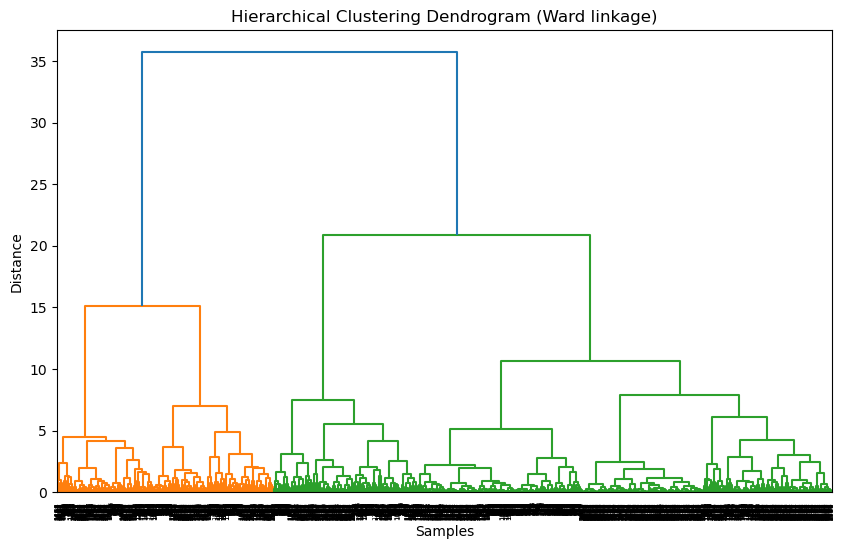

In [28]:
# WARD LINKAGE
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linkage_matrix = linkage(air_scaled.iloc[:,:-2], method = 'ward')

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

This result matches the silhouette score previously obtained for k = 2 in K-Means. 

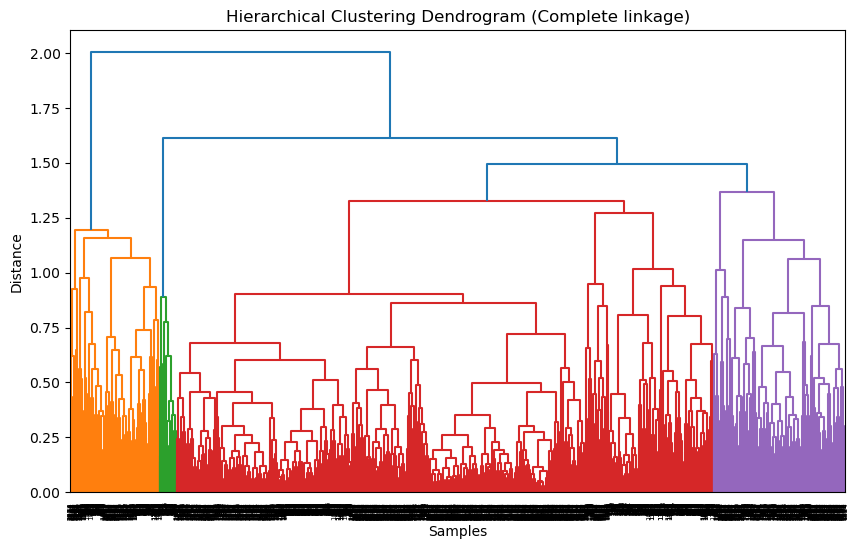

In [29]:
# COMPLETE LINKAGE
linkage_matrix = linkage(air_scaled.iloc[:,:-3], method = 'complete')

# Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Since Complete Linkage suggests 4 clusters, but Ward linkage dendrogram suggested 2 clusters, the difference arises from the linkage criteria:

Ward minimizes variance → prefers compact spherical clusters.

Complete maximizes inter-cluster distance → separates based on outliers more.

In [30]:
# Implementing Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Complete linkage (K=4)
hc_model_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels_complete = hc_model_complete.fit_predict(air_scaled)
silhouette_complete = silhouette_score(air_scaled, labels_complete)
print(f"Silhouette Score (Complete linkage, K=4): {silhouette_complete:.4f}")

# Ward linkage (K=2)
hc_model_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_ward = hc_model_ward.fit_predict(air_scaled)
silhouette_ward = silhouette_score(air_scaled, labels_ward)
print(f"Silhouette Score (Ward linkage, K=2): {silhouette_ward:.4f}")


Silhouette Score (Complete linkage, K=4): 0.6658
Silhouette Score (Ward linkage, K=2): 0.5834


This is a reasonable clustering, especially if the goal was only 2 broad groups. However, it seems some points in the grey cluster could be better reassigned or further split.

In [32]:
# Assign clusters (4 clusters)
linkage_matrix_complete = linkage(air_scaled.iloc[:, :-2], method='complete')
air_scaled["Hier_Cluster"] = fcluster(linkage_matrix_complete, 4, criterion='maxclust')

In [33]:
air_scaled

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,Cluster_2,Cluster_4,Hier_Cluster
0,0.138672,0.0,0.003019,0.026316,0.843629,0.0,0,1,4
1,0.094745,0.0,0.003730,0.052632,0.839768,0.0,0,1,4
2,0.203884,0.0,0.071528,0.105263,0.847732,0.0,0,1,4
3,0.072690,0.0,0.008674,0.026316,0.837838,0.0,0,1,4
4,0.080805,0.0,0.000000,0.000000,0.836631,0.0,0,1,4
...,...,...,...,...,...,...,...,...,...
2870,0.090954,0.0,0.147896,0.105263,0.168316,1.0,1,0,2
2871,0.317569,0.0,0.017019,0.131579,0.167350,1.0,1,0,2
2872,0.363041,0.5,0.441466,0.210526,0.168195,1.0,1,3,2
2873,0.270744,0.0,0.008674,0.026316,0.168074,0.0,0,1,4


#### 2.3. DBSCAN

In [56]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
air_scaled["DB_cluster"] = dbscan.fit_predict(air_scaled.iloc[:, :-3])

In [57]:
air_scaled

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,Cluster_2,Cluster_4,Hier_Cluster,DB_cluster
0,0.138672,0.0,0.003019,0.026316,0.843629,0.0,0,1,4,0
1,0.094745,0.0,0.003730,0.052632,0.839768,0.0,0,1,4,0
2,0.203884,0.0,0.071528,0.105263,0.847732,0.0,0,1,4,0
3,0.072690,0.0,0.008674,0.026316,0.837838,0.0,0,1,4,0
4,0.080805,0.0,0.000000,0.000000,0.836631,0.0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...
2870,0.090954,0.0,0.147896,0.105263,0.168316,1.0,1,0,2,1
2871,0.317569,0.0,0.017019,0.131579,0.167350,1.0,1,0,2,1
2872,0.363041,0.5,0.441466,0.210526,0.168195,1.0,1,3,2,1
2873,0.270744,0.0,0.008674,0.026316,0.168074,0.0,0,1,4,0


In [58]:
air_scaled["DB_cluster"].value_counts()

DB_cluster
 0    2063
 1     796
-1      16
Name: count, dtype: int64

the value of k = 2 from DBSCAN

In [59]:
air_df_final = air_scaled[air_scaled["DB_cluster"] != -1]
air_df_final

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award,Cluster_2,Cluster_4,Hier_Cluster,DB_cluster
0,0.138672,0.0,0.003019,0.026316,0.843629,0.0,0,1,4,0
1,0.094745,0.0,0.003730,0.052632,0.839768,0.0,0,1,4,0
2,0.203884,0.0,0.071528,0.105263,0.847732,0.0,0,1,4,0
3,0.072690,0.0,0.008674,0.026316,0.837838,0.0,0,1,4,0
4,0.080805,0.0,0.000000,0.000000,0.836631,0.0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...
2870,0.090954,0.0,0.147896,0.105263,0.168316,1.0,1,0,2,1
2871,0.317569,0.0,0.017019,0.131579,0.167350,1.0,1,0,2,1
2872,0.363041,0.5,0.441466,0.210526,0.168195,1.0,1,3,2,1
2873,0.270744,0.0,0.008674,0.026316,0.168074,0.0,0,1,4,0


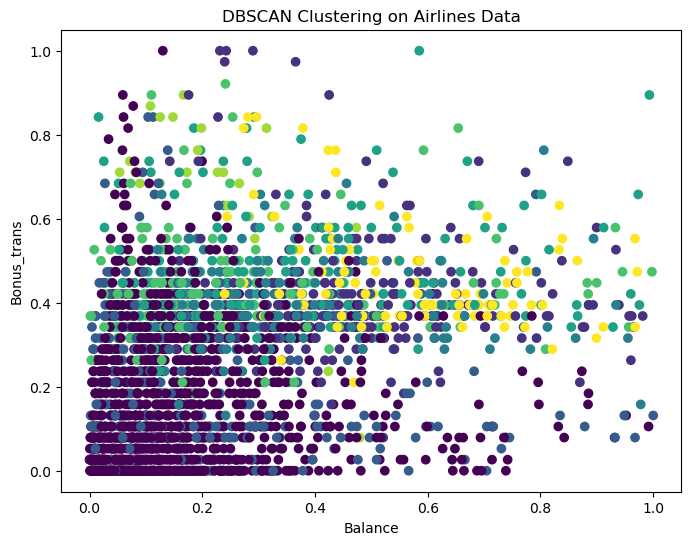

In [62]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(air_scaled['Balance'], air_scaled['Bonus_trans'], c=db.labels_, cmap='viridis')
plt.title('DBSCAN Clustering on Airlines Data')
plt.xlabel('Balance')
plt.ylabel('Bonus_trans')
plt.show()

In [61]:
# Silhouttte score
from sklearn.metrics import silhouette_score
score = silhouette_score(air_scaled,air_scaled["DB_cluster"])
print("Silhouttte score: ",score.round(2))

Silhouttte score:  0.56


#### Conclusion
Best Performance: Agglomerative Clustering (Complete linkage, K=4) has the highest silhouette score (0.6658), indicating the most well-separated and dense clusters.

Second Best: DBSCAN with 2 clusters (silhouette score 0.56) performed better than K-Means.

K-Means had the lowest silhouette scores, suggesting less distinct clusters for both K=2 and K=4.